In [2]:
import os
from pathlib import Path

In [3]:
path = Path('titanic')

In [4]:
path

PosixPath('titanic')

In [5]:
!pip install kaggle

In [6]:
cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)


In [7]:
if not path.exists():
  import zipfile, kaggle
  kaggle.api.competition_download_cli(str(path))
  zipfile.ZipFile(f'{path}.zip').extractall(path)

100%|██████████| 34.1k/34.1k [00:00<00:00, 1.27MB/s]

#### To increase the display of data than default and importing other libraries

In [8]:
import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

In [9]:
df = pd.read_csv(path/'train.csv')

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
modes = df.mode().iloc[0]

In [13]:
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [14]:
df.fillna(modes, inplace=True)

In [15]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [16]:
import numpy as np

df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

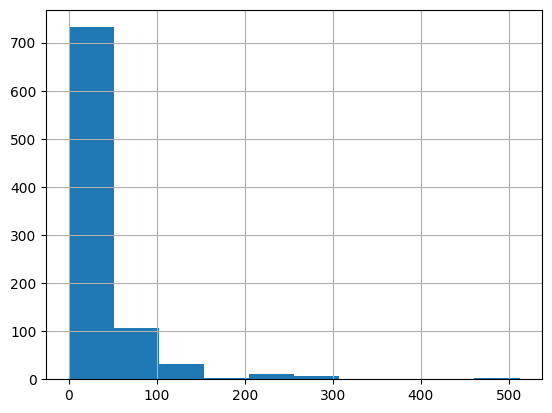

In [17]:
df['Fare'].hist()

In [18]:
df['LogFare'] = np.log(df['Fare']+1)

<Axes: >

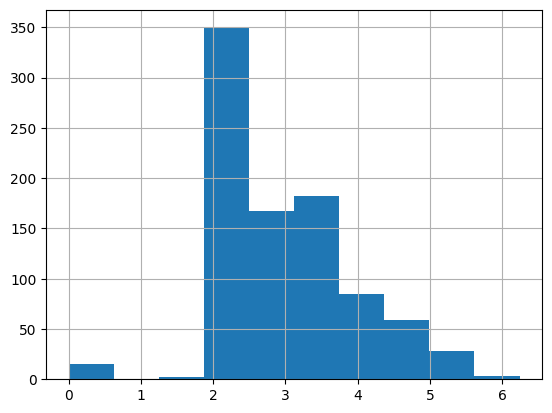

In [19]:
df['LogFare'].hist()

In [20]:
pclasses = sorted(df.Pclass.unique())
pclasses

[1, 2, 3]

#### To get details on non-numeric columns

In [21]:
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [22]:
df = pd.get_dummies(df, columns = ["Sex", "Embarked", "Pclass"])

In [38]:
pd.get_dummies?

In [23]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [118]:
added_cols = ['Sex_male','Sex_female',
              'Pclass_1', 'Pclass_2', 'Pclass_3',
              'Embarked_C', 'Embarked_Q', 'Embarked_S']
df[added_cols].head()

,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,0,1,0,0,1
1,0,1,1,0,0,1,0,0
2,0,1,0,0,1,0,0,1
3,0,1,1,0,0,0,0,1
4,1,0,0,0,1,0,0,1


In [70]:
from torch import tensor

In [71]:
df.Survived.unique()

array([0, 1])

In [119]:
t_dep = tensor(df.Survived)
t_dep

tensor([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 

In [120]:
indep_cols = ['Age', 'SibSp', 'Parch','LogFare']+ added_cols
t_indep = tensor(df[indep_cols].values, dtype = torch.float)
t_indep


tensor([[22.0000,  1.0000,  0.0000,  2.1102,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [38.0000,  1.0000,  0.0000,  4.2806,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000],
        [26.0000,  0.0000,  0.0000,  2.1889,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  1.0000,  0.0000,  3.9908,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  0.0000,  0.0000,  2.2028,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [24.0000,  0.0000,  0.0000,  2.2469,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        [54.0000,  0.0000,  0.0000,  3.9677,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        ...,
        [25.0000,  0.0000,  0.0000,  2.0857,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [39.0000,  0.0000,  5.0000,  3.4054

In [121]:
t_indep.shape

torch.Size([891, 12])

In [135]:
torch.manual_seed(442)

n_coeff = t_indep.shape[1]
coeffs = torch.rand([n_coeff]) - 0.5

In [136]:
t_indep*coeffs

tensor([[-0.1273,  0.0173,  0.0000, -0.0765, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2199,  0.0173,  0.0000, -0.1551, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.4392,  0.0000,  0.0000],
        [-0.1504,  0.0000,  0.0000, -0.0793, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0173,  0.0000, -0.1446, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0000,  0.0000, -0.0798, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.1389,  0.0000,  0.0000, -0.0814, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.2103,  0.0000],
        [-0.3125,  0.0000,  0.0000, -0.1438, -0.2632, -0.0000,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        ...,
        [-0.1447,  0.0000,  0.0000, -0.0756, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2257,  0.0000,  0.2008, -0.1234

In [137]:
vals, indices = t_indep.max(dim=0)
t_indep = t_indep/vals

In [138]:
t_indep * coeffs

tensor([[-0.1273,  0.0173,  0.0000, -0.0765, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2199,  0.0173,  0.0000, -0.1551, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.4392,  0.0000,  0.0000],
        [-0.1504,  0.0000,  0.0000, -0.0793, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0173,  0.0000, -0.1446, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0000,  0.0000, -0.0798, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.1389,  0.0000,  0.0000, -0.0814, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.2103,  0.0000],
        [-0.3125,  0.0000,  0.0000, -0.1438, -0.2632, -0.0000,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        ...,
        [-0.1447,  0.0000,  0.0000, -0.0756, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2257,  0.0000,  0.2008, -0.1234

In [139]:
preds = (t_indep * coeffs).sum(axis=1)
preds[:10]

tensor([ 0.1927, -0.6239,  0.0979,  0.2056,  0.0968,  0.0066,  0.1306,  0.3476,  0.1613, -0.6285])

In [140]:
loss = torch.abs(preds - t_dep).mean()
loss

tensor(0.5382)

In [161]:
def calc_preds (coeffs, indeps): return torch.sigmoid((indeps * coeffs).sum(axis=1))
def calc_loss (coeffs, indeps, deps): return torch.abs(calc_preds(coeffs,indeps) - deps).mean()

In [143]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)

In [144]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(0.5382, grad_fn=<MeanBackward0>)

In [145]:
loss.backward()

In [146]:
coeffs.grad

tensor([-0.0106,  0.0129, -0.0041, -0.0484,  0.2099, -0.2132, -0.1212, -0.0247,  0.1425, -0.1886, -0.0191,  0.2043])

In [147]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
coeffs.grad

tensor([-0.0212,  0.0258, -0.0082, -0.0969,  0.4198, -0.4265, -0.2424, -0.0494,  0.2851, -0.3771, -0.0382,  0.4085])

In [148]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
print("loss:",loss)
with torch.no_grad():
  coeffs.sub_(coeffs.grad*0.1)
  coeffs.grad.zero_()
  print(calc_loss(coeffs, t_indep, t_dep))

loss: tensor(0.5382, grad_fn=<MeanBackward0>)
tensor(0.5228)


In [94]:
from fastai.data.transforms import RandomSplitter

In [95]:
df

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,LogFare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,B96 B98,2.110213,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38.0,1,0,PC 17599,71.2833,C85,4.280593,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2.188856,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,3.990834,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,B96 B98,2.202765,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,B96 B98,2.639057,0,1,0,0,1,0,1,0
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,3.433987,1,0,0,0,1,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",24.0,1,2,W./C. 6607,23.4500,B96 B98,3.196630,1,0,0,0,1,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,3.433987,0,1,1,0,0,1,0,0


In [106]:
trn_split, val_split = RandomSplitter(seed=42)(df)

In [107]:
trn_split

(#713) [788,525,821,253,374,98,215,313,281,305...]

In [108]:
trn_indep, val_indep = t_indep[trn_split], t_indep[val_split]
trn_dep, val_dep = t_dep[trn_split], t_dep[val_split]

In [109]:
len(trn_indep), len(val_indep)

(713, 178)

In [149]:
def update_coeffs(coeffs, lr):
  coeffs.sub_(coeffs.grad*lr)
  coeffs.grad.zero_()

In [111]:
def one_epoch(coeffs, lr):
  loss = calc_loss(coeffs, trn_indep, trn_dep)
  loss.backward()
  with torch.no_grad(): update_coeffs(coeffs, lr)
  print("loss:",loss)

In [112]:
def init_coeffs():
  coeffs = torch.rand(n_coeff) - 0.5
  return coeffs.requires_grad_()

In [150]:
def train_model(epochs=30, lr=0.01):
  torch.manual_seed(442)
  coeffs = init_coeffs()
  print("coeffs: ", coeffs)
  for i in range(epochs): one_epoch(coeffs, lr=lr)
  return coeffs

In [151]:
coeffs = train_model(18, 0.2)

coeffs:  tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)
loss: tensor(0.5359, grad_fn=<MeanBackward0>)
loss: tensor(0.5024, grad_fn=<MeanBackward0>)
loss: tensor(0.4769, grad_fn=<MeanBackward0>)
loss: tensor(0.4537, grad_fn=<MeanBackward0>)
loss: tensor(0.4310, grad_fn=<MeanBackward0>)
loss: tensor(0.4093, grad_fn=<MeanBackward0>)
loss: tensor(0.3878, grad_fn=<MeanBackward0>)
loss: tensor(0.3671, grad_fn=<MeanBackward0>)
loss: tensor(0.3493, grad_fn=<MeanBackward0>)
loss: tensor(0.3358, grad_fn=<MeanBackward0>)
loss: tensor(0.3296, grad_fn=<MeanBackward0>)
loss: tensor(0.3256, grad_fn=<MeanBackward0>)
loss: tensor(0.3285, grad_fn=<MeanBackward0>)
loss: tensor(0.3037, grad_fn=<MeanBackward0>)
loss: tensor(0.3139, grad_fn=<MeanBackward0>)
loss: tensor(0.2957, grad_fn=<MeanBackward0>)
loss: tensor(0.3005, grad_fn=<MeanBackward0>)
loss: tensor(0.2894, grad_fn=<MeanBackward0>)


In [152]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'Age': tensor(-0.2694),
 'SibSp': tensor(0.0901),
 'Parch': tensor(0.2359),
 'LogFare': tensor(0.0280),
 'Sex_male': tensor(-0.3990),
 'Sex_female': tensor(0.2345),
 'Pclass_1': tensor(0.7232),
 'Pclass_2': tensor(0.4112),
 'Pclass_3': tensor(0.3601),
 'Embarked_C': tensor(0.0955),
 'Embarked_Q': tensor(0.2395),
 'Embarked_S': tensor(0.2122)}

In [153]:
pred = calc_preds(coeffs, val_indep)

In [156]:
results = val_dep.bool() == (pred>0.5)
results[:16]

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False, False, False,  True,  True, False])

In [158]:
results.float().mean()

tensor(0.7865)

In [159]:
def acc(coeffs): return (val_dep.bool() == (calc_preds(coeffs, val_indep)>0.5)).float().mean()

In [160]:
preds[:30]

tensor([ 0.1927, -0.6239,  0.0979,  0.2056,  0.0968,  0.0066,  0.1306,  0.3476,  0.1613, -0.6285,  0.2579,  0.0796,  0.1836,  0.2457,
         0.1676, -0.0595,  0.2014,  0.1783,  0.0589, -0.6892,  0.0909,  0.1205,  0.0089,  0.2945,  0.2614,  0.1999, -0.6378,  0.4071,
        -0.0425,  0.1611])

In [162]:
coeffs = train_model(lr=100)

coeffs:  tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)
loss: tensor(0.5101, grad_fn=<MeanBackward0>)
loss: tensor(0.3266, grad_fn=<MeanBackward0>)
loss: tensor(0.2942, grad_fn=<MeanBackward0>)
loss: tensor(0.2074, grad_fn=<MeanBackward0>)
loss: tensor(0.2010, grad_fn=<MeanBackward0>)
loss: tensor(0.1988, grad_fn=<MeanBackward0>)
loss: tensor(0.1977, grad_fn=<MeanBackward0>)
loss: tensor(0.1970, grad_fn=<MeanBackward0>)
loss: tensor(0.1965, grad_fn=<MeanBackward0>)
loss: tensor(0.1961, grad_fn=<MeanBackward0>)
loss: tensor(0.1958, grad_fn=<MeanBackward0>)
loss: tensor(0.1955, grad_fn=<MeanBackward0>)
loss: tensor(0.1953, grad_fn=<MeanBackward0>)
loss: tensor(0.1951, grad_fn=<MeanBackward0>)
loss: tensor(0.1949, grad_fn=<MeanBackward0>)
loss: tensor(0.1948, grad_fn=<MeanBackward0>)
loss: tensor(0.1947, grad_fn=<MeanBackward0>)
loss: tensor(0.1946, grad_fn=<MeanBackward0>)
loss: tensor(0.1944, grad_

In [163]:
acc(coeffs)

tensor(0.8258)

In [164]:
show_coeffs()

{'Age': tensor(-1.5061),
 'SibSp': tensor(-1.1575),
 'Parch': tensor(-0.4267),
 'LogFare': tensor(0.2543),
 'Sex_male': tensor(-10.3320),
 'Sex_female': tensor(8.4185),
 'Pclass_1': tensor(3.8389),
 'Pclass_2': tensor(2.1398),
 'Pclass_3': tensor(-6.2331),
 'Embarked_C': tensor(1.4771),
 'Embarked_Q': tensor(2.1168),
 'Embarked_S': tensor(-4.7958)}

### Test Dataset Prediction

In [182]:
tst_df = pd.read_csv(path/'test.csv')

In [183]:
tst_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [166]:
tst_df['Fare'] = tst_df.Fare.fillna(0)

In [168]:
tst_df.fillna(modes, inplace= True)
tst_df['LogFare'] = np.log(tst_df.Fare+1)

In [170]:
tst_df = pd.get_dummies(tst_df, columns=["Sex","Pclass","Embarked"])
tst_indep = tensor(tst_df[indep_cols].values, dtype=torch.float)
tst_indep = tst_indep / vals

In [174]:
tst_df['Survived'] = (calc_preds(coeffs, tst_indep)>0.5).int()

In [175]:
tst_df['Survived']

0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    0
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int32

In [176]:
sub_df = tst_df[['PassengerId','Survived']]
sub_df.to_csv('sub.csv', index=False)

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,LogFare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Survived
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,B96 B98,2.178064,0,1,0,0,1,0,1,0,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,B96 B98,2.079442,1,0,0,0,1,0,0,1,0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,B96 B98,2.369075,0,1,0,1,0,0,1,0,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,B96 B98,2.268252,0,1,0,0,1,0,0,1,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,B96 B98,2.586824,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",24.0,0,0,A.5. 3236,8.0500,B96 B98,2.202765,0,1,0,0,1,0,0,1,0
414,1306,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,4.699571,1,0,1,0,0,1,0,0,0
415,1307,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,B96 B98,2.110213,0,1,0,0,1,0,0,1,0
416,1308,"Ware, Mr. Frederick",24.0,0,0,359309,8.0500,B96 B98,2.202765,0,1,0,0,1,0,0,1,0


In [181]:
sub_df.Survived.unique()

array([0, 1], dtype=int32)